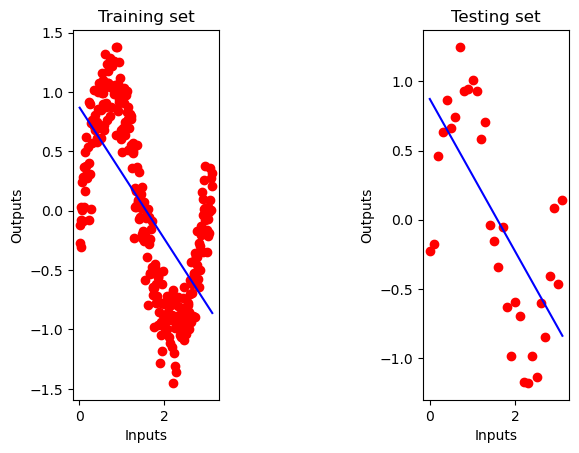

MSE on Training Data:  0.14953637691472502
MSE on Testing Data:  0.1579660860229887
Testing set has more MSE


In [6]:
import numpy as np                             # help in matrices related operations
import pandas as pd                            # help to transform csv data into numpy                      
import matplotlib.pyplot as plt                # help in ploting and visuaization
%matplotlib inline

Trn_Data = pd.read_csv('trainRegression.csv')  # to load csv file into data frame
Tst_Data = pd.read_csv('testRegression.csv')

#print (Trn_Data.head())                       # to show first five records of dataframe in tabular form by defualt
#print (Trn_Data.head(n))                      # to show n records of dataframe in tabular form

Trn_Inputs  = np.array(Trn_Data['X'])          # type casting training data into numpy.
                                               # Trn_Inputs is 1-rank array or vector
Trn_Outputs = np.array(Trn_Data['R'])          


Tst_Inputs  = np.array(Tst_Data['X'])          # type casting testing data into numpy. 
Tst_Outputs = np.array(Tst_Data['R'])

A = np.zeros((2,2))                            # create 2 x 2 array of zeros for A matrix
A[0,0] = Trn_Inputs.shape[0]                   # shape return type is tuple so i select its first element for m
                                               # another aproach A[0,0] = Trn_Data.shape[0]
A[0,1] = np.sum(Trn_Inputs)                    # return the sum of all elements in given array/matrix/vector
A[1,0] = A[0,1]
A[1,1] = np.sum(Trn_Inputs**2)                 # Trn_Inputs**2 = Trn_Inputs * Trn_Inputs (Hadamard Product (Element-wise Product))

B = np.zeros((2,1))                            # create 2 x 1 array of zeros for B matrix
B[0,0] = np.sum(Trn_Outputs)
B[1,0] = np.sum(Trn_Inputs * Trn_Outputs)

A_inv = np.linalg.inv(A)                      # for finding inverse use np.linalg.inv(A)
Thetas = np.zeros((2,1))                      # create 2 x 1 array of zeros for unknown parameters
Thetas = A_inv.dot(B)                         # finding unknown parameters  (θo , θ1)

Predictions_On_Trn_Data = Thetas[0,0] + (Thetas[1,0] * Trn_Inputs) # predictions on training data 
                                                                   # Scalar-vector multiplication
                                                                   # scalor-vector addition

plt.subplot(1,3,1)
plt.scatter(Trn_Inputs , Trn_Outputs , color='red')
plt.plot(Trn_Inputs , Predictions_On_Trn_Data, color = 'blue')
plt.title('Training set')
plt.xlabel('Inputs')
plt.ylabel('Outputs')

# measure mean square error on training data
MSE_Trn = np.sum((Predictions_On_Trn_Data - Trn_Outputs)**2) / (2 * Trn_Inputs.shape[0])

# another approach to find MSE
#MSE_Trn = np.dot((Predictions_On_Trn_Data - Trn_Outputs),(Predictions_On_Trn_Data - Trn_Outputs)) / (2 * Trn_Inputs.shape[0])

Predictions_On_Tst_Data = Thetas[0,0] + (Thetas[1,0] * Tst_Inputs) # predictions on testing data
plt.subplot(1,3,3)
plt.scatter(Tst_Inputs , Tst_Outputs , color='red')
plt.plot(Tst_Inputs , Predictions_On_Tst_Data, color = 'blue')
plt.title('Testing set')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.show()

# measure mean square error on testing data
MSE_Tst = np.sum((Predictions_On_Tst_Data - Tst_Outputs)**2) / (2 * Tst_Inputs.shape[0])

print ("MSE on Training Data: " , MSE_Trn)
print ("MSE on Testing Data: " , MSE_Tst)

if MSE_Trn == MSE_Tst:
    print ('Both data sets has same MSE')
elif MSE_Trn > MSE_Tst:
    print ('Training set has more MSE')
else:
    print ('Testing set has more MSE')
